Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Harishraj Udaya Bhaskar, Aushee Khamesra (6120) (Write these in every notebook you submit. For each partner, write down whether you are a 4120 or a 6120 student.)

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required

from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



2023-10-27 14:42:17.651905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /Users/harisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

def bow_vectorizer(tokenized_documents, test_documents,binary=True):
    # Combine training and test documents for vectorization
    all_documents = [' '.join(tokens) for tokens in tokenized_documents + test_documents]

    # Create and fit the vectorizer on all documents
    vectorizer = CountVectorizer(binary=binary)
    X_all = vectorizer.fit_transform(all_documents)

    # Separate training and test vectors
    X_train = X_all[:len(tokenized_documents)]
    X_test = X_all[len(tokenized_documents):]
    feature_names=vectorizer.get_feature_names_out()
    

    return X_train, X_test,feature_names
X_train_binary, X_test_binary,feature_names_binary  = bow_vectorizer(train_tups[0], dev_tups[0])
X_train_multi,X_test_multi,feature_names_multi= bow_vectorizer(train_tups[0], dev_tups[0],False)



In [22]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell
from keras.optimizers import SGD 
model = Sequential()

inputDim = X_train_binary.shape[1]

#Converting to np array 
X_train_np_binary = X_train_binary.toarray()
X_test_np_binary = X_test_binary.toarray()

X_train_np_multi=X_train_multi.toarray()
X_test_np_multi=X_test_multi.toarray()


model.add(Dense(64, input_dim=inputDim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

# put in an output layer

model.summary()
# call compile here


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                1539456   
                                                                 
 dense_59 (Dense)            (None, 128)               8320      
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,547,905
Trainable params: 1,547,905
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(X_train_np_multi.shape)
print(X_train_np_binary.shape)
print(X_test_np_multi.shape)
print(X_test_np_binary.shape)

(1600, 24053)
(1600, 24053)
(200, 24053)
(200, 24053)


How many trainable parameters does your model have? __2,125,953__

In [5]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

model.fit(X_train_np_binary, np.asarray(train_tups[1]), epochs=3, batch_size=32, validation_data=(X_test_np_binary, np.asarray(dev_tups[1])))



Epoch 1/3
50/50 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.4950 - val_loss: 0.6921 - val_accuracy: 0.5200
Epoch 2/3
50/50 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.6169 - val_loss: 0.6877 - val_accuracy: 0.5700
Epoch 3/3
50/50 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.6906 - val_loss: 0.6810 - val_accuracy: 0.6250


In [6]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
predictions = model.predict(X_test_np_binary)
classifications = (predictions > 0.65).astype(int)

7/7 [==============================] - 0s 2ms/step


In [7]:
classifications

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [8]:
# use the model.evaluate function to report the loss and accuracy on the dev set

loss, accuracy = model.evaluate(X_test_np_binary,np.asarray (dev_tups[1]))

print("Dev Set Loss:", loss)
print("Dev Set Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6250
Dev Set Loss: 0.6810110211372375
Dev Set Accuracy: 0.625


Epoch 1/3
5/5 [==============================] - 0s 39ms/step - loss: 0.6959 - accuracy: 0.4563 - val_loss: 0.6912 - val_accuracy: 0.5350
Epoch 2/3
5/5 [==============================] - 0s 20ms/step - loss: 0.6669 - accuracy: 0.6500 - val_loss: 0.6856 - val_accuracy: 0.5700
Epoch 3/3
7/7 [==============================] - 0s 2ms/step
Epoch 1/3
10/10 [==============================] - 0s 17ms/step - loss: 0.6851 - accuracy: 0.5906 - val_loss: 0.6820 - val_accuracy: 0.6150
Epoch 2/3
10/10 [==============================] - 0s 8ms/step - loss: 0.6157 - accuracy: 0.8531 - val_loss: 0.6500 - val_accuracy: 0.7050
Epoch 3/3
7/7 [==============================] - 0s 2ms/step
Epoch 1/3
15/15 [==============================] - 0s 12ms/step - loss: 0.6887 - accuracy: 0.5396 - val_loss: 0.6715 - val_accuracy: 0.6500
Epoch 2/3
15/15 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.8521 - val_loss: 0.6086 - val_accuracy: 0.7200
Epoch 3/3
7/7 [=============================

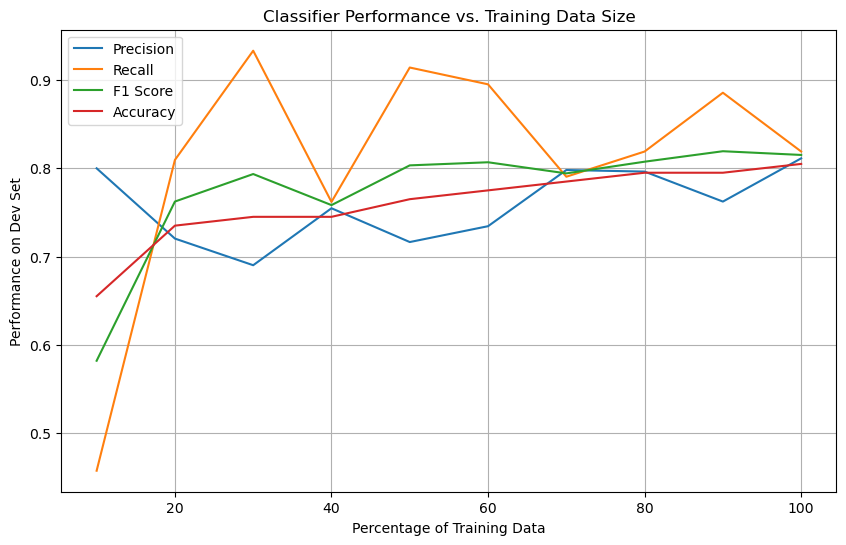

In [31]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)


#3 Epochs Binary 
binary_3_epochs=sutils.create_training_graph_nn(X_train_np_binary,train_tups[1],X_test_np_binary,dev_tups[1],3)

Epoch 1/3
5/5 [==============================] - 0s 35ms/step - loss: 0.6934 - accuracy: 0.5312 - val_loss: 0.7134 - val_accuracy: 0.5350
Epoch 2/3
5/5 [==============================] - 0s 17ms/step - loss: 0.6777 - accuracy: 0.5688 - val_loss: 0.6658 - val_accuracy: 0.6100
Epoch 3/3
7/7 [==============================] - 0s 2ms/step
Epoch 1/3
10/10 [==============================] - 0s 22ms/step - loss: 0.7001 - accuracy: 0.4844 - val_loss: 0.6888 - val_accuracy: 0.5550
Epoch 2/3
10/10 [==============================] - 0s 9ms/step - loss: 0.6363 - accuracy: 0.6687 - val_loss: 0.6240 - val_accuracy: 0.6800
Epoch 3/3
7/7 [==============================] - 0s 2ms/step
Epoch 1/3
15/15 [==============================] - 0s 12ms/step - loss: 0.7131 - accuracy: 0.5604 - val_loss: 0.7014 - val_accuracy: 0.5500
Epoch 2/3
15/15 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.7125 - val_loss: 0.6386 - val_accuracy: 0.6500
Epoch 3/3
7/7 [=============================

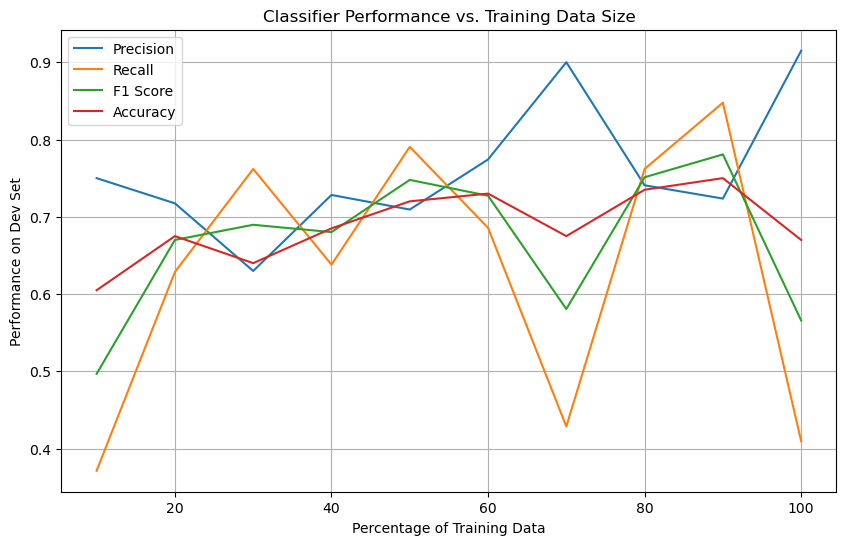

In [29]:
#Epochs 3 Multinomial
multinomial_3_epochs=sutils.create_training_graph_nn(X_train_np_multi,train_tups[1],X_test_np_multi,dev_tups[1],3)

Epoch 1/10
5/5 [==============================] - 0s 39ms/step - loss: 0.6983 - accuracy: 0.4688 - val_loss: 0.6941 - val_accuracy: 0.4900
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6609 - accuracy: 0.6562 - val_loss: 0.6872 - val_accuracy: 0.5300
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6065 - accuracy: 0.8750 - val_loss: 0.6743 - val_accuracy: 0.6050
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.5511 - accuracy: 0.9812 - val_loss: 0.6570 - val_accuracy: 0.6400
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4818 - accuracy: 0.9875 - val_loss: 0.6403 - val_accuracy: 0.6500
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4107 - accuracy: 0.9875 - val_loss: 0.6199 - val_accuracy: 0.7050
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.3477 - accuracy: 0.9937 - val_loss: 0.6039 - val_accuracy: 0.7000
Epoch 8/10
5/5 [===========

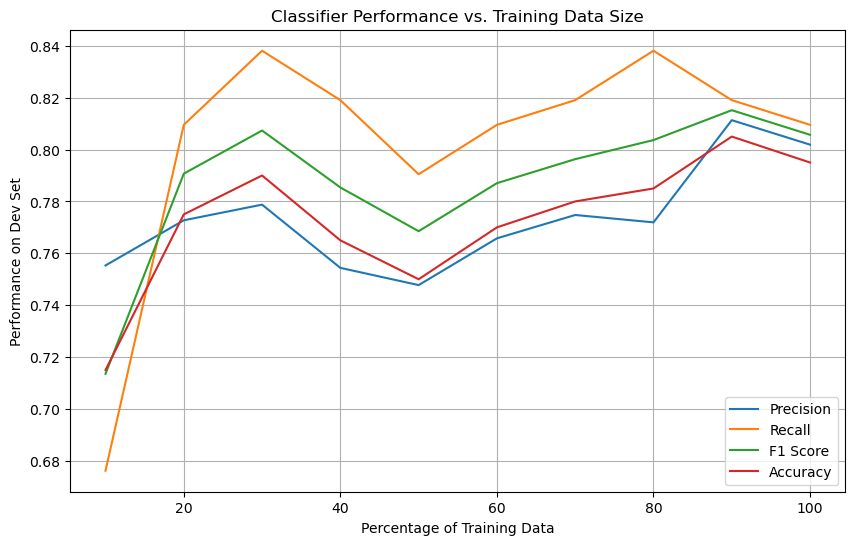

In [37]:
# For epoch 10 
binary_10_epochs=sutils.create_training_graph_nn(X_train_np_binary,train_tups[1],X_test_np_binary,dev_tups[1],10)

Epoch 1/10
5/5 [==============================] - 0s 44ms/step - loss: 0.6958 - accuracy: 0.5188 - val_loss: 0.7035 - val_accuracy: 0.5100
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.7800 - accuracy: 0.5750 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5799 - accuracy: 0.8000 - val_loss: 0.6533 - val_accuracy: 0.6050
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4951 - accuracy: 0.8813 - val_loss: 0.6521 - val_accuracy: 0.6400
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4306 - accuracy: 0.8500 - val_loss: 0.6830 - val_accuracy: 0.6300
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.3957 - accuracy: 0.8938 - val_loss: 0.6489 - val_accuracy: 0.6600
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.3072 - accuracy: 0.9375 - val_loss: 0.6853 - val_accuracy: 0.6300
Epoch 8/10
5/5 [===========

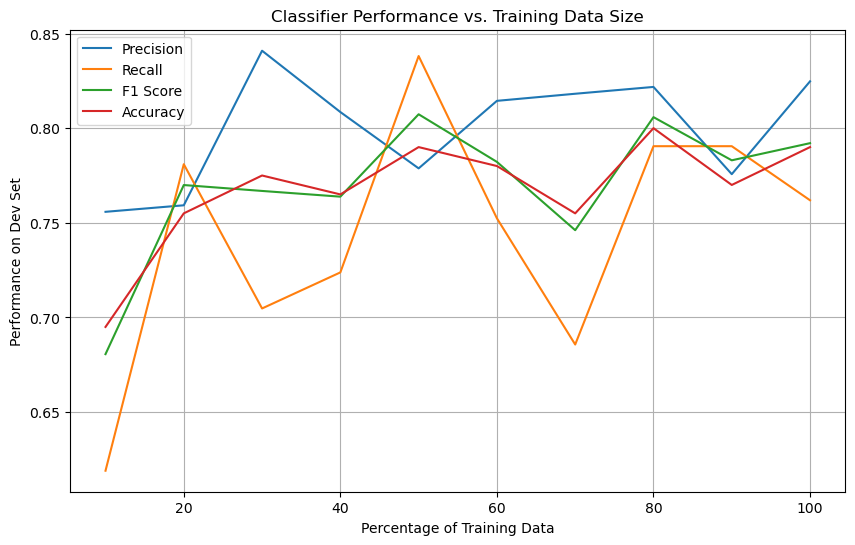

In [38]:
# 10 epochs for multinomial 
multinomial_10_epochs=sutils.create_training_graph_nn(X_train_np_multi,train_tups[1],X_test_np_multi,dev_tups[1],10)

Epoch 1/20
5/5 [==============================] - 0s 40ms/step - loss: 0.6947 - accuracy: 0.5250 - val_loss: 0.6921 - val_accuracy: 0.5500
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6582 - accuracy: 0.6812 - val_loss: 0.6857 - val_accuracy: 0.5900
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6083 - accuracy: 0.9187 - val_loss: 0.6733 - val_accuracy: 0.6600
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.5482 - accuracy: 0.9875 - val_loss: 0.6602 - val_accuracy: 0.6400
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.4838 - accuracy: 0.9812 - val_loss: 0.6422 - val_accuracy: 0.7000
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.4160 - accuracy: 0.9875 - val_loss: 0.6259 - val_accuracy: 0.6850
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3493 - accuracy: 0.9937 - val_loss: 0.6079 - val_accuracy: 0.7300
Epoch 8/20
5/5 [===========

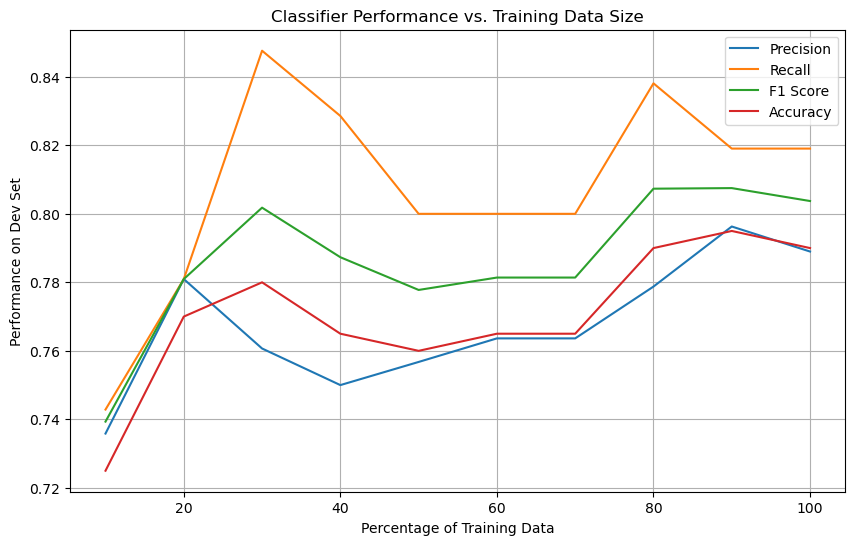

In [39]:
#20 epochs for binary 
binary_20_epochs=sutils.create_training_graph_nn(X_train_np_binary,train_tups[1],X_test_np_binary,dev_tups[1],20)

Epoch 1/20
5/5 [==============================] - 0s 40ms/step - loss: 0.7524 - accuracy: 0.5375 - val_loss: 0.6892 - val_accuracy: 0.5050
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6657 - accuracy: 0.6500 - val_loss: 0.6804 - val_accuracy: 0.5900
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6196 - accuracy: 0.7500 - val_loss: 0.6807 - val_accuracy: 0.5600
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5597 - accuracy: 0.7688 - val_loss: 0.6572 - val_accuracy: 0.6200
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.4966 - accuracy: 0.8562 - val_loss: 0.6697 - val_accuracy: 0.6150
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.4506 - accuracy: 0.8687 - val_loss: 0.6495 - val_accuracy: 0.6450
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3636 - accuracy: 0.9312 - val_loss: 0.6654 - val_accuracy: 0.6450
Epoch 8/20
5/5 [===========

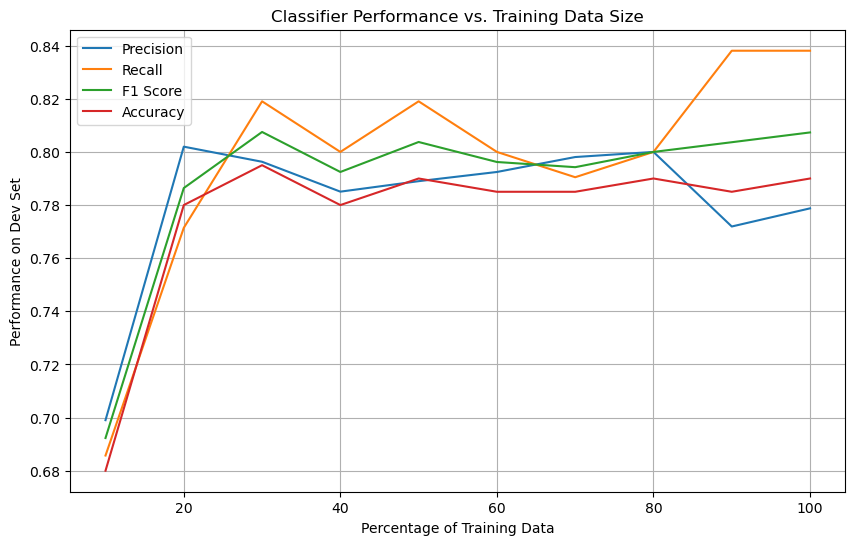

In [40]:
#20 epochs for multi
multinomial_20_epochs=sutils.create_training_graph_nn(X_train_np_multi,train_tups[1],X_test_np_multi,dev_tups[1],20)

In [35]:
print(f'f1 score for binary NN : {binary_3_epochs[-1]}')
print(f'f1 score for multinomial NN : {multinomial_3_epochs[-1]}')


f1 score for binary NN : 0.8151658767772513
f1 score for multinomial NN : 0.5657894736842105


Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: 3
- multinomial features:  0.5657894736842105

- binarized features: 0.8151658767772513